<a href="https://colab.research.google.com/github/honlai/Financial_Mathematics_I/blob/main/Risk_Parity_and_Budgeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nov6 Note
##Risk Contribution of portfolio assets
###Profit and Loss of the portfolio
$$\large\hspace{5mm} \Pi=\sum_{i=1}^N\Pi_i$$
###Risk-adjusted performance measure
$$\large\hspace{5mm} \mathcal{RAPM}(\Pi):=\frac{\mathbb{E}[\Pi]}{\mathcal{R}(\Pi)}$$

$$\large\hspace{5mm} \mathcal{RAPM}(\Pi_i|\Pi):=\frac{\mathbb{E}[\Pi_i]}{\mathcal{R}(\Pi_i|\Pi)}$$

where $\mathcal{R}$ is corherent risk measure
###**Thm:**
$$\large\hspace{5mm} \mathcal{R}(\Pi_i|\Pi)=\frac{d}{dh}\mathcal{R}(h\Pi_i+\Pi)|_{h=0}$$ if

(1) (full allocation property)

$$\large\hspace{5mm} \mathcal{R}(\Pi)=\sum_{i=1}^N\mathcal{R}(\Pi_i|\Pi)$$

(2) ( $\mathcal{RAPM}$ compatible)

$$\large\hspace{5mm} \exists \epsilon_i>0 $$
$$\large\hspace{5mm} s.t. \mathcal{RAPM}(\Pi_i|\Pi)>\mathcal{RAPM}(\Pi)$$
$$\large\hspace{5mm} \Rightarrow \mathcal{RAPM}(h\Pi_i+\Pi)>\mathcal{RAPM}(\Pi) \hspace{5mm} \forall 0<h<\epsilon_i$$

###**Def:**
###Risk contribution of asset $i$
$$\large\hspace{5mm} \mathcal{RC}_i(\mathcal{w}):=\mathcal{w}_i\frac{\partial\mathcal{R}(\mathcal{w})}{\partial\mathcal{w}_i}$$
satisfying Euler allocation principle:
$$\large\hspace{5mm} \mathcal{R}(\mathcal{w})=\sum_{i=1}^N\mathcal{w}_i\frac{\partial\mathcal{R}(\mathcal{w})}{\partial\mathcal{w}_i}=\sum_{i=1}^N\mathcal{RC}_i(\mathcal{w})$$



---



##Risk budgeting portfolio
Want to control the risk allocation of the portfolio.

Given $[b_1, b_2, ... ,b_N]$

called relative risk contribution
s.t. $\sum_{i=1}^Nb_i=1$, $b_i\ge0$

###Consider non-linear system
$$\large\hspace{5mm} \mathcal{RC}_i(\mathcal{w})=b_i\mathcal{R}(\mathcal{w})$$ $$\sum_{i=1}^N\mathcal{w}_i=1 ,\hspace{5mm} \mathcal{w}_i\ge0$$
(Langrange method)
$$\large\hspace{5mm} \Longleftrightarrow min_\mathcal{y}\mathcal{R}(\mathcal{y})$$ $$\large\hspace{5mm} u.c.\hspace{5mm} \sum_{i=1}^Nb_iln(\mathcal{y}_i)\ge c ,\hspace{5mm} \mathcal{y}\ge0$$
where $c$ is an arbitrary constant

###Solution
(1) If $b_i>0\hspace{5mm}\forall i$ then solution exists and unique.

(2) If $b_i \ge 0\hspace{5mm}\forall i$ then there may be several solutions.

(3) If $\rho_{i,j} \ge 0\hspace{5mm}\forall i,j$ then solution unique.

If $b_i=\frac{1}{N}\hspace{5mm}\forall i$ called ERC portfolio

Consider $u(\mathcal{w})=\mathcal{w}^T \mu-\frac{\phi}{2}\mathcal{R}(\mathcal{w})^2$

·optimal$\Leftrightarrow \partial_\mathcal{w}u(\mathcal{w})=0\\
\Leftrightarrow\mu = \phi \mathcal{R}(\mathcal{w})\frac{\partial\mathcal{R}(\mathcal{w})}{\partial\mathcal{w}}$

·Performance Contribution

$\mathcal{PC}_i$$=\mathcal{w}_i\mu_i\\
=\phi\mathcal{R}(\mathcal{w})\mathcal{RC}_i\\
\propto b_i$

---

#Note
##Constrained Risk Budgeting Portfolios
##Theory, Algorithms, Applications & Puzzles
##SSRN-id3331184

In [90]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

###Assets
$\large\hspace{5mm} i = 1, 2, ..., N$
###Points in time
$\large\hspace{5mm} t = t_1 ,t_2 ..., t_M$

In [91]:
#股票代號
stocks_list=np.array(['2330.TW','2357.TW','2454.TW','3231.TW'])
#開始日期
start_date='2020-01-01'
#完結日期
end_date='2023-10-01'
#股票數
N=len(stocks_list)
#次數
M=0#len(data)

###Price of $i$ th stock
$\large\hspace{5mm}P_i(t)$

In [92]:
# 創建一個空的的主數據框data
data = pd.DataFrame()
for stock in stocks_list:
    # yf.download(股票代號,start=開始日期,end=完結日期)
    # yf.download(股票代號,period=日期範圍(1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max),
    #         interval=頻率(1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo))
    df=yf.download(stock,start=start_date,end=end_date)
    df=df[['Adj Close']]#調整後收盤價
    df=df.rename(columns = {'Adj Close': stock})
    if data.empty:
        data = df
    else:
        data=pd.concat([data, df], axis=1)
    print(stock)

[*********************100%%**********************]  1 of 1 completed
2330.TW
[*********************100%%**********************]  1 of 1 completed
2357.TW
[*********************100%%**********************]  1 of 1 completed
2454.TW
[*********************100%%**********************]  1 of 1 completed
3231.TW


910
               2330.TW     2357.TW     2454.TW     3231.TW
Date                                                      
2020-01-02  312.051575  167.492874  342.400604   22.340094
2020-01-03  312.511749  168.936752  336.971832   22.261433
2020-01-06  305.608032  167.853836  328.828705   22.025446
2020-01-07  303.306763  169.658737  330.379730   22.418758
2020-01-08  303.306763  167.492874  333.869690   22.104109
...                ...         ...         ...         ...
2023-09-22  522.000000  357.500000  746.000000  102.500000
2023-09-25  525.000000  359.500000  755.000000  103.000000
2023-09-26  519.000000  358.000000  737.000000  101.500000
2023-09-27  522.000000  364.000000  737.000000  103.000000
2023-09-28  523.000000  367.000000  735.000000  101.500000

[910 rows x 4 columns]


<Axes: xlabel='Date'>

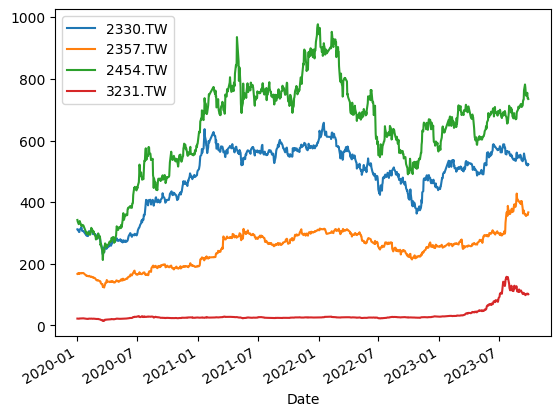

In [93]:
M=len(data)
print(M)
print(data)
data.plot()

###Corresponding returns (linear returns)
$\large\hspace{5mm} R_i(t)=\frac{P_i(t)-P_i(t-1)}{P_i(t-1)}=\frac{P_i(t)}{P_i(t-1)}-1$


In [94]:
crpd_rtn = pd.DataFrame()
for stock in stocks_list:
  tmp=pd.DataFrame({stock:data[stock]})
  i=1
  for price in data[stock][:-1]:
    tmp[stock][i]/=price
    #tmp[stock][i]-=1
    i+=1
  tmp[stock][0]=1
  crpd_rtn=pd.concat([crpd_rtn, tmp], axis=1)
crpd_rtn

,2330.TW,2357.TW,2454.TW,3231.TW
Date,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000
2020-01-03,1.001475,1.008621,0.984145,0.996479
2020-01-06,0.977909,0.993590,0.975834,0.989399
2020-01-07,0.992470,1.010753,1.004717,1.017857
2020-01-08,1.000000,0.987234,1.010563,0.985965
...,...,...,...,...
2023-09-22,0.990512,1.007042,1.000000,1.019900
2023-09-25,1.005747,1.005594,1.012064,1.004878
2023-09-26,0.988571,0.995828,0.976159,0.985437


             2330.TW   2357.TW   2454.TW   3231.TW
Date                                              
2020-01-02  1.000000  1.000000  1.000000  1.000000
2020-01-03  1.001475  1.008621  0.984145  0.996479
2020-01-06  0.979351  1.002155  0.960363  0.985916
2020-01-07  0.971976  1.012931  0.964892  1.003521
2020-01-08  0.971976  1.000000  0.975085  0.989437
...              ...       ...       ...       ...
2023-09-22  1.672800  2.134419  2.178734  4.588163
2023-09-25  1.682414  2.146360  2.205019  4.610545
2023-09-26  1.663187  2.137404  2.152449  4.543401
2023-09-27  1.672800  2.173227  2.152449  4.610545
2023-09-28  1.676005  2.191138  2.146608  4.543401

[910 rows x 4 columns]


<Axes: xlabel='Date'>

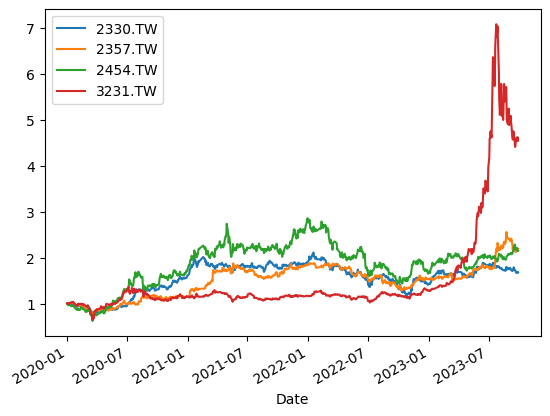

In [95]:
crpd_rtn_cumprod=crpd_rtn.cumprod(axis = 0)
print(crpd_rtn_cumprod)
crpd_rtn_cumprod.plot()

###Mean returns
$\large\hspace{5mm} \mu_i=\frac{1}{M}\sum_{t=1}^MR_i(t)$
###Expected returns
$\large\hspace{5mm} \mu=(\mu_1,\mu_2,...,\mu_N)^T$

In [96]:
def get_e_rtn(arg_crpd_rtn):
  f_expected_rtn=arg_crpd_rtn.mean()
  return f_expected_rtn
expected_rtn=get_e_rtn(crpd_rtn)

###Correlation matrix (correlation between asset i and asset j)
$\large\hspace{5mm}\rho_{i,j}$
###Volatility of asset i (standard deviation)
$\large\hspace{5mm}\sigma_i$
###Covariance matrix of asset returns
$\large\hspace{5mm} \Sigma_{i,j}=\rho_{i,j}\sigma_i\sigma_j$

In [97]:
def get_crl_matrix(arg_crpd_rtn):
  f_correlation_matrix = np.corrcoef(arg_crpd_rtn,None,False)
  return f_correlation_matrix
def get_std(arg_crpd_rtn):
  f_std_dev = np.std(arg_crpd_rtn)
  return f_std_dev
def get_cov(arg_crpd_rtn):
  f_correlation_matrix=get_crl_matrix(arg_crpd_rtn)
  f_std_dev=get_std(arg_crpd_rtn)
  f_covariance_matrix = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      f_covariance_matrix[i][j]=f_correlation_matrix[i][j]*f_std_dev[i]*f_std_dev[j]
  return f_covariance_matrix

In [98]:
correlation_matrix=get_crl_matrix(crpd_rtn)
print(correlation_matrix)
std_dev=get_std(crpd_rtn)
print(std_dev)
covariance_matrix=get_cov(crpd_rtn)
print(covariance_matrix)

[[1.         0.31567569 0.54784234 0.28542178]
 [0.31567569 1.         0.24134568 0.33636722]
 [0.54784234 0.24134568 1.         0.18037033]
 [0.28542178 0.33636722 0.18037033 1.        ]]
2330.TW    0.017668
2357.TW    0.017332
2454.TW    0.024861
3231.TW    0.022527
dtype: float64
[[3.12148380e-04 9.66638198e-05 2.40632247e-04 1.13595898e-04]
 [9.66638198e-05 3.00389352e-04 1.03991892e-04 1.31326067e-04]
 [2.40632247e-04 1.03991892e-04 6.18066759e-04 1.01013125e-04]
 [1.13595898e-04 1.31326067e-04 1.01013125e-04 5.07446206e-04]]


###Portfolio volatility
$\large\hspace{5mm} \sigma(\mathcal{w})=\sqrt{\mathcal{w}^T\Sigma\mathcal{w}}$
###Standard deviation-based risk measure
$\large\hspace{5mm} \mathcal{R}(\mathcal{w})=-\mathcal{w}^T(\mu-r)+c\cdot\sigma(\mathcal{w})$
###where c is a scalar that measures the trade-off between the expected return of the portfolio and its volatility.
###Risk budget
$\large\hspace{5mm} b_i\gt0,\hspace{5mm}\sum_{i=1}^Nb_i=1$
###Risk contribution of asset $i$
$\large\hspace{5mm} \mathcal{R}\mathcal{C}_i(\mathcal{w})=\mathcal{w}_i\cdot(-(\mu_i-r)+c\cdot\frac{(\Sigma\mathcal{w})_i}{\sigma(\mathcal{w})})=b_i\mathcal{R}(\mathcal{w})$
##**Remark:**
###1. Roncalli (2015):
$\large\hspace{5mm} RBP\hspace{5mm}exists\hspace{5mm}and\hspace{5mm}unique \hspace{5mm}if\hspace{5mm}c \gt SR^+$

$\large\hspace{5mm} where\hspace{5mm}SR^+=max\lbrace sup\hspace{2mm}SR(\mathcal{w}|r),\hspace{2mm}0 \rbrace\hspace{5mm}for\hspace{5mm}\mathcal{w}\in\lbrack0,1\rbrack^n$
###2. The original Equal Risk Contribution(ERC) portfolio is obtained by considering the volatility risk measure and the same risk budgets.
$\large\hspace{5mm} i.e. \mu_i=r , c=1 , b_i=\frac{1}{N}$
###Then we have
$\large\hspace{5mm} \mathcal{R}\mathcal{C}_i(\mathcal{w})=\frac{1}{N}\sigma(\mathcal{w})$

In [99]:
#parameters
#ERC
r=expected_rtn
c=1
risk_budget=np.ones(N)
risk_budget/=N

def get_pvol(arg_w):
  """Get the portfolio volatility: (w.T * cov * w.)**0.5 """
  sigma=(arg_w.T.dot(covariance_matrix.dot(arg_w)))**0.5
  return sigma
def std_dev_b_risk_measure(arg_w):
  """Get the standard deviation-based risk measure: R(w)"""
  R=-arg_w.T.dot(expected_rtn-r)+c*get_pvol(arg_w)
  return R
def risk_contribution(arg_w):
  """Get the risk contribution: RCi(w)"""
  RC=np.zeros(N)
  for i in range(N):
    RCi=arg_w[i]*(-(expected_rtn-r)+c*(covariance_matrix.dot(arg_w)[i])/get_pvol(arg_w))
    #RCi=risk_budget[i]*std_dev_b_risk_measure(arg_w)
    RC[i]+=RCi[0]
  return RC

In [100]:
w_test=np.ones(N)
w_test[0]*=0.25
w_test[1]*=0.25
w_test[2]*=0.25
w_test[3]*=0.25

#print(std_dev_b_risk_measure(w_test))
#print(risk_contribution(w_test))


###Roncalli (2013):
$\large\hspace{5mm} \mathcal{w}_{RB}=arg\hspace{2mm}min\hspace{2mm}\mathcal{R}(\mathcal{w})$
$\large\hspace{5mm} s.t. \sum_{i=1}^Nb_iln(\mathcal{w}_i)\geq\kappa^* \hspace{5mm}\kappa^*\hspace{2mm}is\hspace{2mm}constant$
###Using the Lagrange formulation
$\large\hspace{5mm}\mathcal{w}^*(\lambda)=arg\hspace{2mm}min\hspace{2mm}\mathcal{R}(\mathcal{w})-\lambda\sum_{i=1}^Nb_iln(\mathcal{w}_i)\tag1$

$\large\hspace{5mm} \lambda\hspace{2mm}is\hspace{2mm}an\hspace{2mm}arbitrary\hspace{2mm}constant$

$\large\hspace{5mm} \mathcal{w}_{RB}=\frac{\mathcal{w}^*(\lambda)}{1^T\mathcal{w}^*(\lambda)}$

##The Newton algorithm(may be improved)
###Spinu (2013) solving (1) by the Newton algorithm
$\large\hspace{5mm} \mathcal{w}^{(k+1)}=\mathcal{w}^{(k)}-\eta^{(k)}(\frac{\partial^2f(\mathcal{w}^{(k)})}{\partial\mathcal{w}\hspace{2mm}\partial\mathcal{w}^T})^{-1} \hspace{2mm}\frac{\partial f(\mathcal{w}^{(k)})}{\partial\mathcal{w}}$

where $\eta^{(k)}\in\lbrack0,1\rbrack$ is the step size and $k$ is the iteration index.
generally, we set $\eta^{(k)}=1$


###The first and second derivatives are computed using the following analytical expressions
$\large\hspace{5mm} \frac{\partial f(\mathcal{w})}{\partial\mathcal{w}_i}=\frac{\mathcal{R}\mathcal{C}_i(\mathcal{w})}{\mathcal{w}_i}-\lambda\frac{b_i}{\mathcal{w}_i}$

$\large\hspace{5mm} \frac{\partial^2 f(\mathcal{w})}{\partial\mathcal{w}_i\partial\mathcal{w}_j}=\frac{c}{\sigma(\mathcal{w})}(\Sigma_{i,j}-\frac{(\Sigma\mathcal{w})_i(\Sigma\mathcal{w})_j}{\sigma^2(\mathcal{w})})$

$\large\hspace{5mm}\frac{\partial^2 f(\mathcal{w})}{\partial\mathcal{w}_i^2}=\frac{c}{\sigma(\mathcal{w})}(\sigma_i^2-\frac{(\Sigma\mathcal{w})_i^2}{\sigma^2(\mathcal{w})})+\lambda\frac{b_i}{\mathcal{w}_i^2}$


In [101]:
ld=1

def get_df(arg_w):
  df = np.zeros(N)
  RC=risk_contribution(arg_w)
  for i in range(N):
    df[i]=RC[i]/arg_w[i]-ld*(risk_budget[i]/arg_w[i])

  return df

def get_ddf(arg_w):
  ddf = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      if j==i:
        ddf[i][j]=(c/get_pvol(arg_w))*\
              (std_dev[i]**2-((covariance_matrix.dot(arg_w)[i])**2/(get_pvol(arg_w)**2)))+\
                ld*risk_budget[i]/arg_w[i]**2
      else:
        ddf[i][j]=(c/get_pvol(arg_w))*\
              (covariance_matrix[i][j]-((covariance_matrix.dot(arg_w)[i])*(covariance_matrix.dot(arg_w)[j]))/(get_pvol(arg_w)**2))
  return ddf

def netwon(arg_w0,tor,Nmax):
  w=[arg_w0]
  error=1
  for i in range(Nmax):
    if error < tor:
      break
    tmp=w[i]-np.linalg.inv(get_ddf(w[i])).dot(get_df(w[i]))
    w.append(tmp)
    error=abs(sum(w[i]-w[i-1]))
  return pd.DataFrame({'weight':w[-1]/np.sum(w[-1]),'stocks':stocks_list}).set_index('stocks').transpose()

#df(w_test)

w_newton=(netwon(w_test,10**-11,100))
w_newton


stocks,2330.TW,2357.TW,2454.TW,3231.TW
weight,0.264531,0.296471,0.202835,0.236163


##The CCD algorithm
###The descent algorithm
$\large\hspace{5mm} \mathcal{w}^{(k+1)}=\mathcal{w}^{(k)}+\Delta\mathcal{w}^{(k)}=\mathcal{w}^{(k)}-\eta D^{(k)}$
###The coordinate descent algorithm
$\large\hspace{5mm} \mathcal{w}_i^{(k+1)}=\mathcal{w}_i^{(k)}+\Delta\mathcal{w}_i^{(k)}=\mathcal{w}_i^{(k)}-\eta D_i^{(k)}$

Concerning the choice of the variable i, there are two approaches:

random coordinate descent or RCD (Nesterov, 2012)

cyclical coordinate descent or CCD (Tseng, 2001)
###The CCD algorithm
$\large\hspace{5mm} \mathcal{w}_i^{(k+1)}=arg\hspace{2mm} min f(\mathcal{w}_1^{(k+1)} ,...,\mathcal{w}_{i-1}^{(k+1)},\mathcal{w},\mathcal{w}_{i+1}^{(k+1)},...,\mathcal{w}_N^{(k+1)})$

Griveau-Billion et al. (2013), solving (1) by the CCD algorithm

$\large\hspace{5mm} \mathcal{w}_i=\frac{-c(\sigma_i\sum_{j\neq i}
\mathcal{w}_j\rho_{i,j}\sigma_j)+(\mu_i-r)\sigma(\mathcal{w})+\sqrt{(c(\sigma_i\sum_{j\neq i}
\mathcal{w}_j\rho_{i,j}\sigma_j)-(\mu_i-r)\sigma(\mathcal{w}))^2+4\lambda cb_i\sigma_i^2\sigma(\mathcal{w})}}{2c\sigma_i^2}$
can be simplified by setting $\lambda=1$

In [102]:
def ccd(arg_w0,tor,Nmax):
  w=[arg_w0]
  error=1
  for k in range(Nmax):
    if error < tor:
      break
    tmp=np.zeros(N)
    for i in range(N):
      sigma=get_pvol(w[k])
      wps=0
      for j in range(N):
        if j==i:
          continue
        wps+=w[k][j]*\
          correlation_matrix[i][j]*\
          std_dev[j]
      #print(-c*(std_dev[i]*wps)/(2*c*std_dev[i]*std_dev[i]))
      #print((expected_rtn-r)[i]*sigma/(2*c*std_dev[i]*std_dev[i]))
      #print(((c*(std_dev[i]*wps)-(expected_rtn-r)[i]*sigma)**2+ \
      #    (4*ld*c*risk_budget[i]*std_dev[i]*std_dev[i]*sigma))**(1/2)/ \
      #      (2*c*std_dev[i]*std_dev[i]))
      tmp[i]=-c*(std_dev[i]*wps)/(2*c*std_dev[i]*std_dev[i])+ \
          (expected_rtn-r)[i]*sigma/(2*c*std_dev[i]*std_dev[i])+ \
          ((c*(std_dev[i]*wps)-(expected_rtn-r)[i]*sigma)**2+ \
            (4*ld*c*risk_budget[i]*std_dev[i]*std_dev[i]*sigma))**(1/2)/ \
              (2*c*std_dev[i]*std_dev[i])
    w.append(tmp)
    error=abs(sum(w[k]-w[k-1]))
  return pd.DataFrame({'weight':w[-1]/np.sum(w[-1]),'stocks':stocks_list}).set_index('stocks').transpose()
w_ccd=ccd(w_test,10**-11,100)
w_ccd

stocks,2330.TW,2357.TW,2454.TW,3231.TW
weight,0.264531,0.296471,0.202835,0.236163


##Code in paper

In [104]:
%pip install git+https://github.com/jcrichard/pyrb

  Cloning https://github.com/jcrichard/pyrb to /tmp/pip-req-build-h25lw8k8
  Running command git clone --filter=blob:none --quiet https://github.com/jcrichard/pyrb /tmp/pip-req-build-h25lw8k8
  Resolved https://github.com/jcrichard/pyrb to commit 250054efe02ce48cd1ae1ef72f8d808951af5a53
  Preparing metadata (setup.py) ... done


In [105]:
from pyrb import EqualRiskContribution as erc

ERC = erc(covariance_matrix)
ERC.solve()
w_pyrb_ERC = ERC.x
print(w_pyrb_ERC)
print(w_newton)
print(w_ccd)

[0.26453112 0.29647103 0.20283462 0.23616323]
stocks   2330.TW   2357.TW   2454.TW   3231.TW
weight  0.264531  0.296471  0.202835  0.236163
stocks   2330.TW   2357.TW   2454.TW   3231.TW
weight  0.264531  0.296471  0.202835  0.236163


---